In [19]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


dataset = pd.read_csv('uk_renewable_energy.csv')

dataset.head()

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels,Fraction from renewable sources and waste,Hydroelectric power,Wind energy,Solar energy,Geothermal aquifers,Landfill gas,Sewage gas,...,Municipal solid waste (MSW),Poultry litter,Straw,Wood,Charcoal,Liquid bio-fuels,Bioethanol,Biodiesel,Biomass,Cross-boundary Adjustment
0,1990,1.647,225.532,0.007,0.448,0.001,0.0,0.001,0.080,0.138,...,0.183,0.000,0.007,0.687,0.039,0.0,0.0,0.0,0.065,0.0
1,1991,1.634,231.288,0.007,0.398,0.001,0.0,0.001,0.105,0.151,...,0.185,0.000,0.007,0.687,0.036,0.0,0.0,0.0,0.065,0.0
2,1992,1.843,228.696,0.008,0.467,0.003,0.0,0.001,0.155,0.151,...,0.210,0.016,0.007,0.736,0.033,0.0,0.0,0.0,0.065,0.0
3,1993,1.862,231.368,0.008,0.370,0.019,0.0,0.001,0.162,0.158,...,0.268,0.043,0.007,0.736,0.034,0.0,0.0,0.0,0.065,0.0
4,1994,2.528,230.739,0.011,0.438,0.030,0.0,0.001,0.188,0.170,...,0.385,0.101,0.007,1.108,0.034,0.0,0.0,0.0,0.065,0.0


In [20]:
# Basic descriptive statistics
data_cleaned.describe()

# Correlation matrix
correlation_matrix = data_cleaned.corr()
correlation_matrix.head()

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels,Fraction from renewable sources and waste,Hydroelectric power,Wind energy,Solar energy,Geothermal aquifers,Landfill gas,Sewage gas,Biogas from autogen,Municipal solid waste (MSW),Poultry litter,Straw,Wood,Charcoal,Liquid bio-fuels,Bioethanol,Biodiesel,Biomass
Year,1.000000,0.924335,-0.646933,0.766644,0.436418,0.749697,0.671865,4.928054e-01,0.728379,0.808114,0.691971,0.373604,0.781454,0.771313,0.726512,0.669520,0.075474,0.769704,0.761178,0.760929
Energy from renewable & waste sources,0.924335,1.000000,-0.722195,0.792527,0.480908,0.788603,0.761184,6.145413e-01,0.429004,0.777505,0.770442,0.443138,0.559587,0.775768,0.781213,0.687272,-0.086793,0.672387,0.709602,0.787739
Total energy consumption of primary fuels,-0.646933,-0.722195,1.000000,-0.918448,-0.678448,-0.928266,-0.869558,8.025229e-16,-0.368064,-0.908531,-0.885795,-0.472371,-0.457551,-0.841313,-0.912513,-0.809074,0.243578,-0.830705,-0.858130,-0.894464
Fraction from renewable sources and waste,0.766644,0.792527,-0.918448,1.000000,0.613059,0.995202,0.962957,-1.050023e-16,0.484518,0.964367,0.972933,0.573922,0.667821,0.973595,0.981826,0.848482,-0.135085,0.811266,0.885888,0.992235
Hydroelectric power,0.436418,0.480908,-0.678448,0.613059,1.000000,0.627519,0.570710,1.039928e-15,0.273042,0.581583,0.573782,0.165830,0.316206,0.525758,0.614659,0.493641,-0.095926,0.520320,0.511762,0.585850


In [27]:
dataset.columns[1]

'Energy from renewable & waste sources'

In [30]:
year = dataset['Year']
ren_energy = dataset['Energy from renewable & waste sources']
fossil_energy = dataset['Total energy consumption of primary fuels']
frac_ren = dataset['Fraction from renewable sources and waste']

Text(0, 0.5, 'Fraction (no units)')

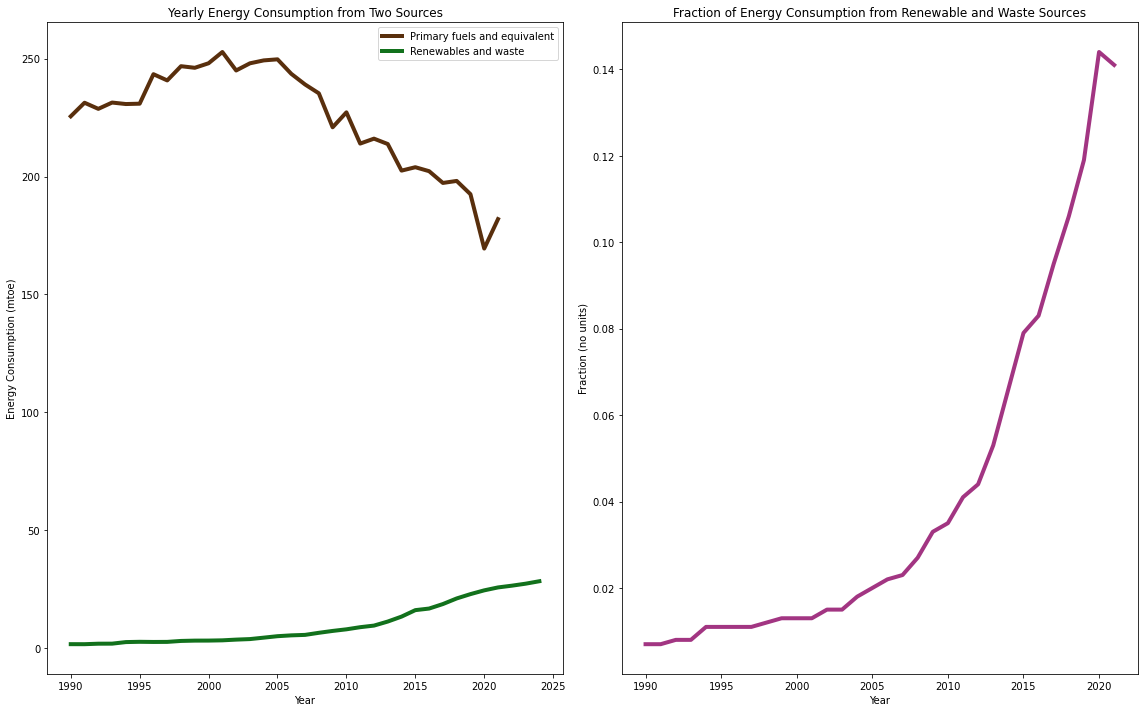

In [32]:
cp = sns.color_palette('dark')
sns.set_palette('dark')

fig, axes = plt.subplots(1,2,figsize=(16, 10), tight_layout=True)
left, right = axes
sns.lineplot(x=year, y=fossil_energy, linewidth=4, color=cp[5], ax=axes[0])
sns.lineplot(x=year, y=ren_energy, linewidth=4, color=cp[2], ax=axes[0])
left.set_title('Yearly Energy Consumption from Two Sources')
left.set_ylabel('Energy Consumption (mtoe)')
left.legend(['Primary fuels and equivalent', 'Renewables and waste'], loc='upper right')

sns.lineplot(x=year, y=frac_ren, linewidth=4, color=cp[6], ax=axes[1])
right.set_title('Fraction of Energy Consumption from Renewable and Waste Sources')
right.set_ylabel('Fraction (no units)')

In [25]:
dataset = pd.read_csv('uk_renewable_energy.csv')
data_cleaned = dataset.drop(columns=['Cross-boundary Adjustment'])

def plot_scatter(dataset, x_col, y_col):
    """
    Creates a scatter plot showing the relationship between x_col and y_col.
    
    Parameters:
    data (DataFrame): The dataset
    x_col (str): Column name for the x-axis
    y_col (str): Column name for the y-axis
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_col], data[y_col], alpha=0.7)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Relationship between {x_col} and {y_col}')
    plt.show()
    
plot_scatter(dataset, x_col, y_col)

NameError: name 'x_col' is not defined

In [7]:
# Example for line plot of selected renewable energy sources over time
def plot_line_trends(data_cleaned):
    
    plt.figure(figsize=(12, 6))
    plt.plot(data_cleaned['Year'], data_cleaned['Wind energy'], label='Wind energy', color='blue')
    plt.plot(data_cleaned['Year'], data_cleaned['Solar energy'], label='Solar', color='orange')
    plt.plot(data_cleaned['Year'], data_cleaned['Hydroelectric power'], label='Hydro', color='green')
    plt.title('Renewable Energy Production Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Production (in TWh or MW)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_line_trends(data_cleaned)

NameError: name 'data_cleaned' is not defined

In [3]:
def plot_heatmap(dataset):
    color = plt.get_cmap('coolwarm')
    color.set_bad('white')
    to_plot =  df.iloc[:,4:]
    to_plot = to_plot.drop('Geothermal aquifers', axis=1)
    matrix = np.triu(to_plot.corr())

    plt.figure(figsize=(12,12))
    sns.heatmap(to_plot.corr(), cmap=color, annot=True, fmt = '.1g')
    plt.show()
    
plot_heatmap(dataset)

NameError: name 'dataset' is not defined